# Open Todos:
- check how many parititions are created by just using the invariant clustering and not nx isomorphism check
- double check vertex degree invariant implementation

In [1]:
from synutility.SynIO.data_type import load_from_pickle
from cluster_reaction_centers import cluster_reaction_centers
import networkx as nx


data = load_from_pickle("/home/mark/Documents/graph_theory/ITS_graphs.pkl.gz")
reactions = [reaction["ITS"] for reaction in data]

In [2]:
def edge_count_invariant(reaction_center, partition_representant_reaction_center):
    edge_count_reaction_center = len(reaction_center.edges)
    edge_count_partition_representant = len(partition_representant_reaction_center.edges)

    return edge_count_reaction_center == edge_count_partition_representant

In [3]:
def vertex_count_invariant(reaction_center, partition_representant_reaction_center):
    vertex_count_reaction_center = len(reaction_center.nodes)
    vertex_count_partition_representant = len(partition_representant_reaction_center.nodes)

    return vertex_count_reaction_center == vertex_count_partition_representant

In [4]:
# TODO: check if this implementation for degree invariant is actually correct

def vertex_degree_invariant(reaction_center, partition_representant_reaction_center):
    reaction_center_degrees = sorted([degree for node, degree in list(reaction_center.degree)])
    partition_representant_degrees = sorted([degree for node, degree in list(partition_representant_reaction_center.degree)])

    return reaction_center_degrees == partition_representant_degrees

In [5]:
from math import isclose

def algebraic_connectivity_invariant(reaction_center, partition_representant_reaction_center):
    algebraic_connectivity_reaction_center = nx.algebraic_connectivity(reaction_center)
    algebraic_connectivity_partition_representant_reaction_center = nx.algebraic_connectivity(partition_representant_reaction_center)

    return isclose(algebraic_connectivity_reaction_center, algebraic_connectivity_partition_representant_reaction_center, rel_tol=1e-6)

In [6]:
import numpy as np

def rank_invariant(reaction_center, partition_representant_reaction_center):
    reaction_center_rank = float(np.linalg.matrix_rank(nx.to_pandas_adjacency(reaction_center).values))
    partition_representant_rank = float(np.linalg.matrix_rank(nx.to_pandas_adjacency(partition_representant_reaction_center).values))

    return isclose(reaction_center_rank, partition_representant_rank, rel_tol=1e-6)

In [7]:
from get_reaction_center import get_reaction_center

def can_find_partition_by_invariant(partitions, reaction_center, invariant_check_function):
    for index, partition in enumerate(partitions):
        partition_representant = partition[0]
        reaction_center_partition_representant = get_reaction_center(partition_representant)

        if invariant_check_function(reaction_center, reaction_center_partition_representant):
            return index
        
    return False


In [8]:
import time

start_time = time.time()

pre_filtered_partitions = []

invariant_check_function = rank_invariant

for reaction_its in reactions:
    reaction_center = get_reaction_center(reaction_its)
    edge_count_invariant_partition_index = can_find_partition_by_invariant(pre_filtered_partitions, reaction_center, edge_count_invariant)

    if type(edge_count_invariant_partition_index) is int:
            pre_filtered_partitions[edge_count_invariant_partition_index].append(reaction_its)
    else:
        pre_filtered_partitions.append([reaction_its])

overall_partitions = []

for pre_filtered_partition in pre_filtered_partitions:
    partitions = cluster_reaction_centers(pre_filtered_partition)
    overall_partitions = overall_partitions + partitions

end_time = time.time()

# Summary

In [9]:
elapsed_time = end_time - start_time

print(f"Time elapsed: {elapsed_time:.2f} seconds")

print(f"Partitions found: {len(overall_partitions)}")

Time elapsed: 101.73 seconds
Partitions found: 301


IndexError: list index out of range

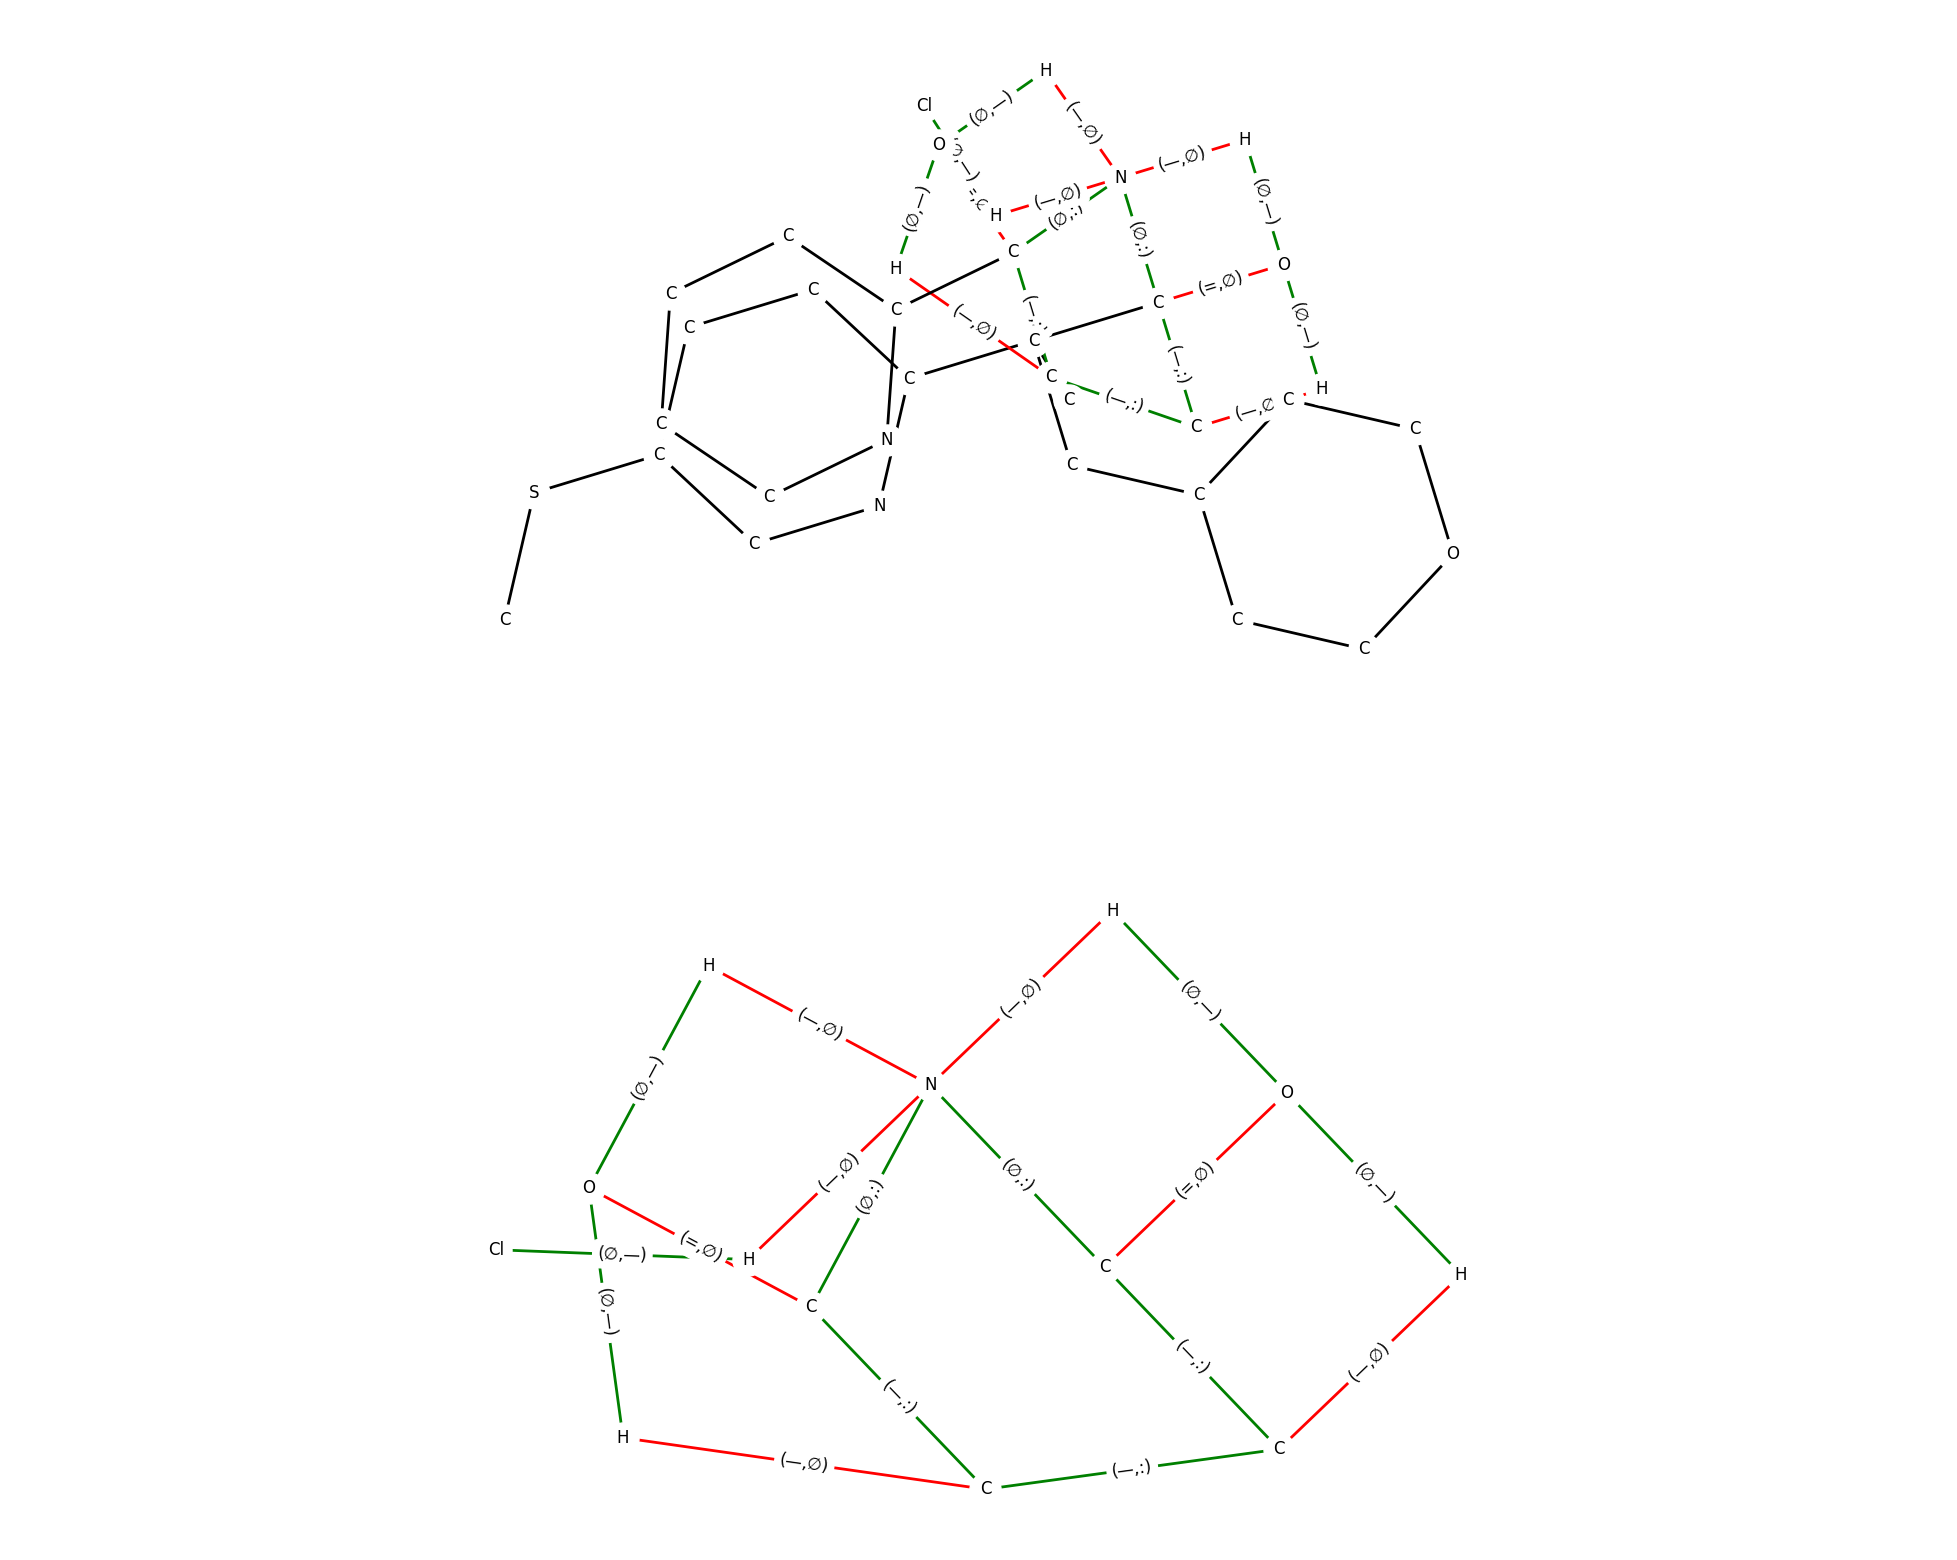

In [10]:
from visualize_graph import visualize_graph

current_partition = partitions[0]

visualize_graph(current_partition[0], with_reaction_center=True)
visualize_graph(current_partition[1], with_reaction_center=True)